# Introduction

### Dataset

dataset adalah kumpulan data SDM. Dalam dataset terdiri dari 50000 baris dan 14 kolom.

### Sumber data

data asli berasal dari kaggle dengan link data : https://www.kaggle.com/shivan118/hranalysis?select=train.csv

### Objectivitas

Setiap tahunnya, ada sekitar 5% karyawannya melakukan promosi di perusahaan. untuk itu, kita akan membuat model klasifikasi untuk melihat apakah karyawan dipromosikan atau tidak?

# Import Pustaka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

# model classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier

# for pipeline
from sklearn.pipeline import Pipeline, make_pipeline

## for feature slection
from sklearn.feature_selection import SelectFromModel

# for preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV


# for handle imbalaced dataset
from imblearn.over_sampling import SMOTE

# for matrics evaluation
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

# Data Loading

#### memuat dataset

In [2]:
data = pd.read_csv('hr_data.csv')

#### melihat data teratas

In [3]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


#### melihat data terbawah

In [4]:
data.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


#### melihat informasi data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


#### melihat statistika data

In [6]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


#### melihat dimensi data

In [7]:
data.shape

(54808, 14)

dataset terdiri dari 54808 rows dan 14 columns

# Data cleaning

In [8]:
data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

terdapat data missing dasa untuk feature education sebanyak 2409 data dan feature previous_year_rating sebanyak 4124 data

# Exploratory Data Analysis

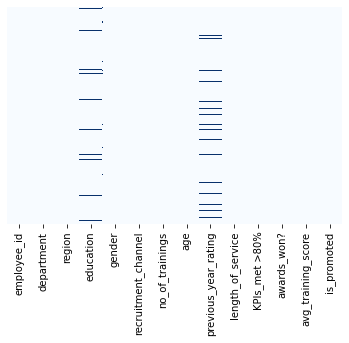

In [9]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap="Blues");

Dari visualisasi terlihat bahwa feature pendidikan (education) dan penilaian rating (previous_year_rating) memiliki missing values

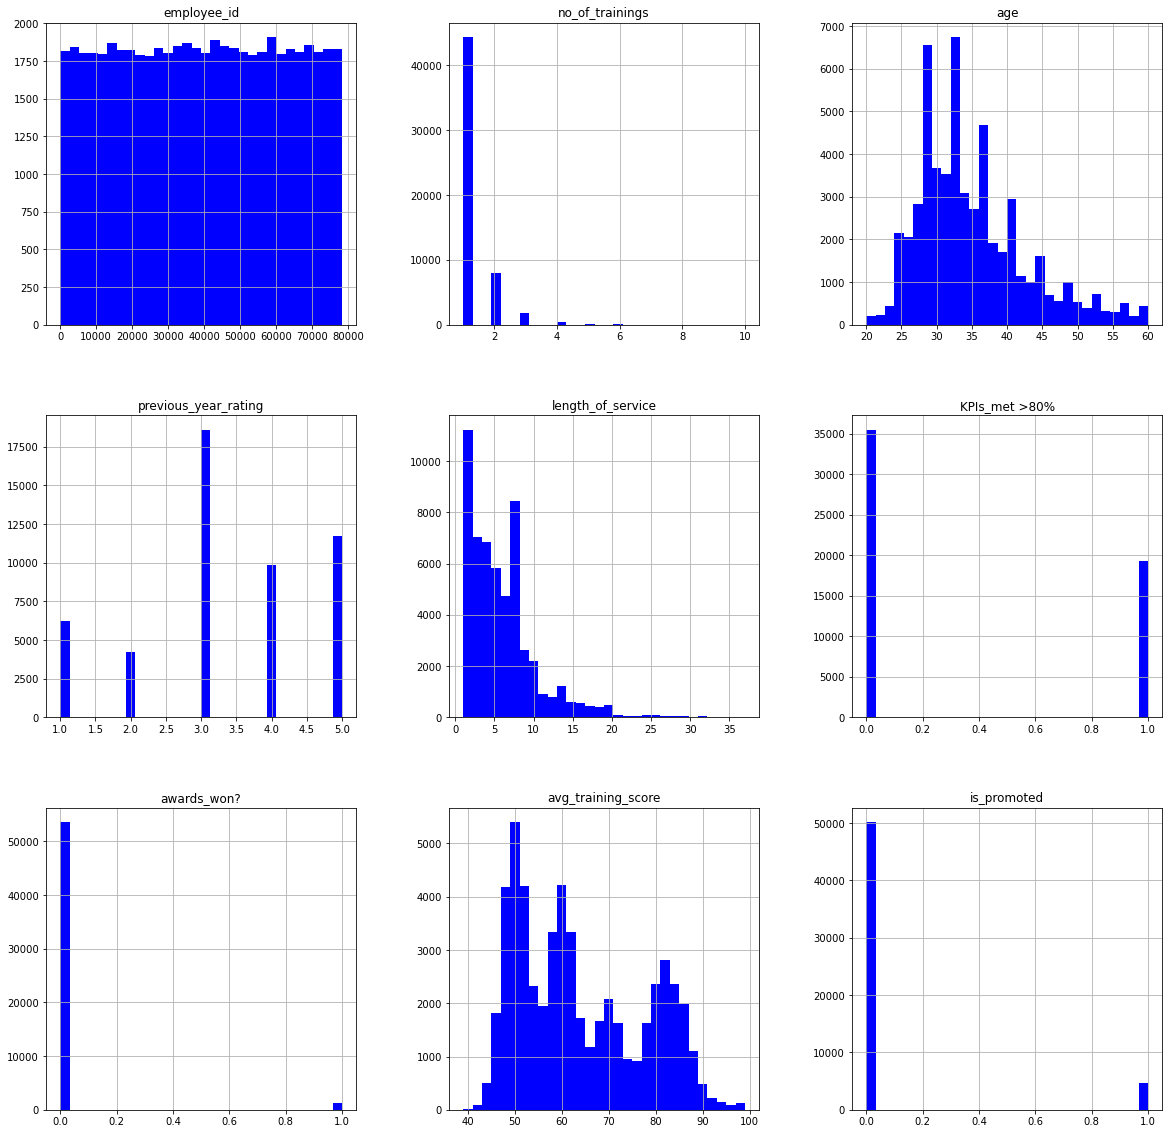

In [10]:
data.hist(bins = 30, figsize = (20,20), color = 'blue');

Dari visualisasi terlihat beberapa features seperti 'no_of_trainings', 'age' dan 'length_of_service' memiliki distribusi condong ke kiri (skewed negatif)

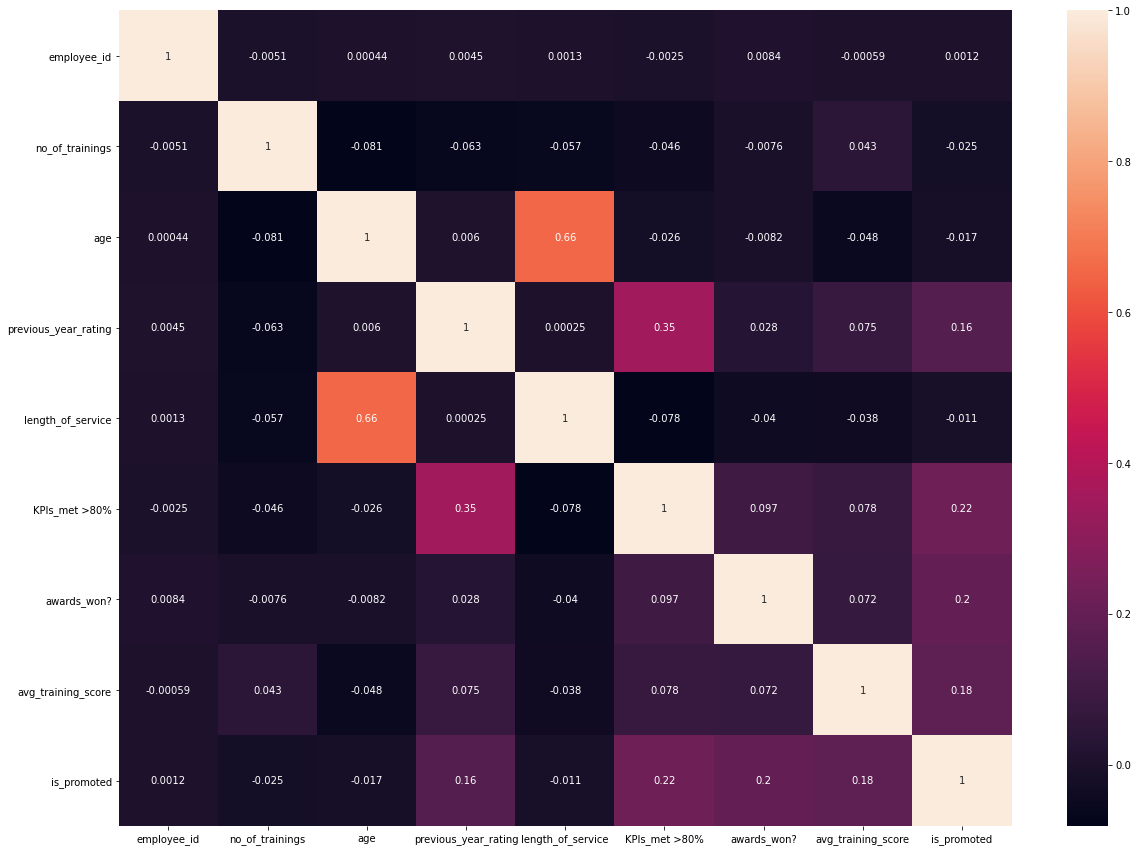

In [11]:
corr = data.corr()
f, ax = plt.subplots(figsize = (20, 15))
sns.heatmap(corr, annot = True);

Dari visualisasi terlihat bahwa usia karyawan (age) memiliki korelasi yang kuat dengan lama bekerja di perusahaan (length_of_service)

### Visualisasi Numerical Features

In [12]:
Numerical_features = [feature for feature in data.columns if data[feature].dtypes!='O']

print("Jumlah Numerical Features {}".format(len(Numerical_features)))

Jumlah Numerical Features 9


#### Visualisasi Karyawan yang mendapatkan promosi

In [13]:
not_promoted = data[data['is_promoted'] == 0]
promoted = data[data['is_promoted'] == 1]

print("Total karyawan  =", len(data))
print("Total karyawan yang tidak mendapatkan promosi =", len(not_promoted))
print("Total karyawan yang mendapatkan promosi =", len(promoted))

Total karyawan  = 54808
Total karyawan yang tidak mendapatkan promosi = 50140
Total karyawan yang mendapatkan promosi = 4668


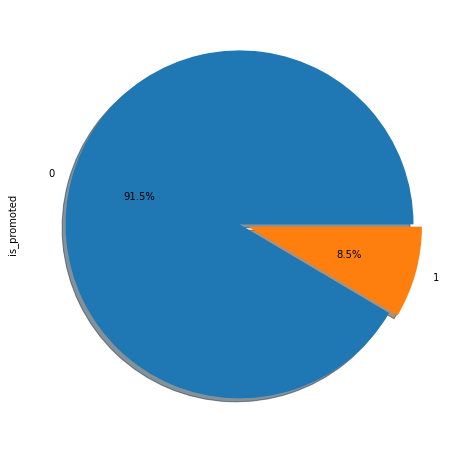

In [14]:
plt.figure(figsize=(8,8))
data['is_promoted'].value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%', shadow=True);

Dari Visualisasi terlihat bahwa karyawan yang mendapatkan promosi sebanyak 4668 orang (8,5%) sedangkan yang tidak mendapatkan promosi sebanyak 50140 orang (91.5%)

#### Visualisasi hubungan usia karyawan dengan promosi karyawan

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


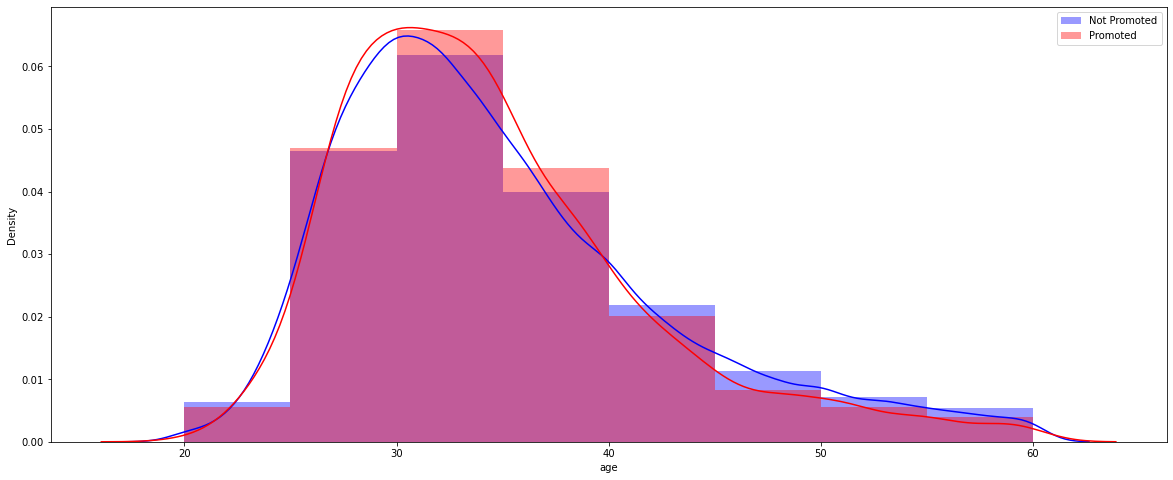

In [15]:
plt.figure(figsize=(20,8))
sns.distplot(data['age'][data['is_promoted'] == 0], bins=[20, 25, 30, 35, 40, 45, 50, 55, 60], color='b', label='Not Promoted')
sns.distplot(data['age'][data['is_promoted'] == 1], bins=[20, 25, 30, 35, 40, 45, 50, 55, 60], color='r', label='Promoted')
plt.legend();

Dari visualisasi terlihat bahwa usia rata-rata yang mendapatkan promosi berada pada range usia 30 sampai dengan 40 tahun

#### Visualisasi hubungan training yang didapatkan oleh karyawan dengan promosi karyawan

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


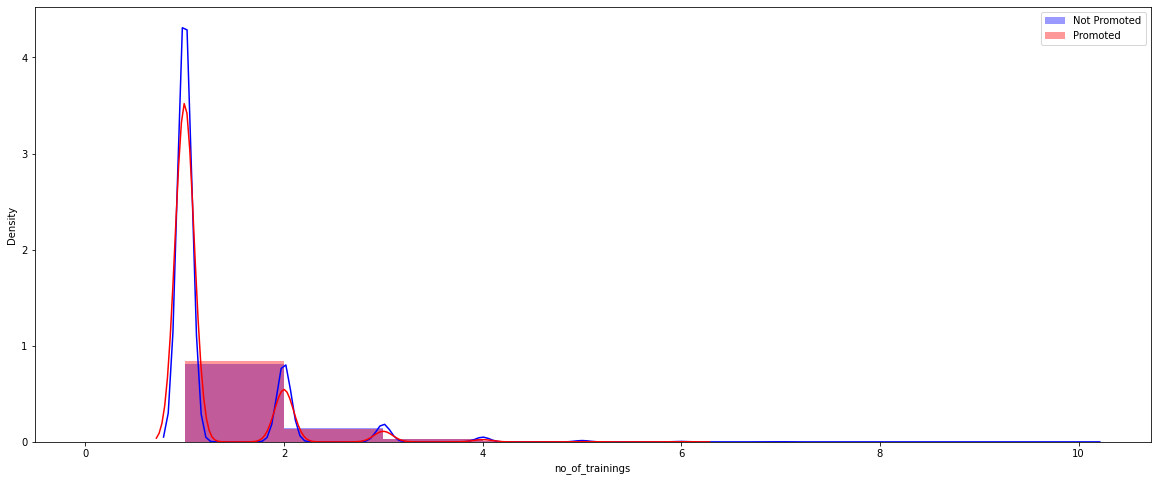

In [16]:
plt.figure(figsize=(20,8))
sns.distplot(data['no_of_trainings'][data['is_promoted'] == 0], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], color='b', label='Not Promoted')
sns.distplot(data['no_of_trainings'][data['is_promoted'] == 1], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], color='r', label='Promoted')
plt.legend();

Dari visualisasi terlihat bahwa selama rata-rata karyawan yang mendapatkan promosi adalah karyawan yang mendapatkan training 1 sampai 2 kali

#### Visualisasi hubungan rating penghargaan karyawan dengan promosi karyawan

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


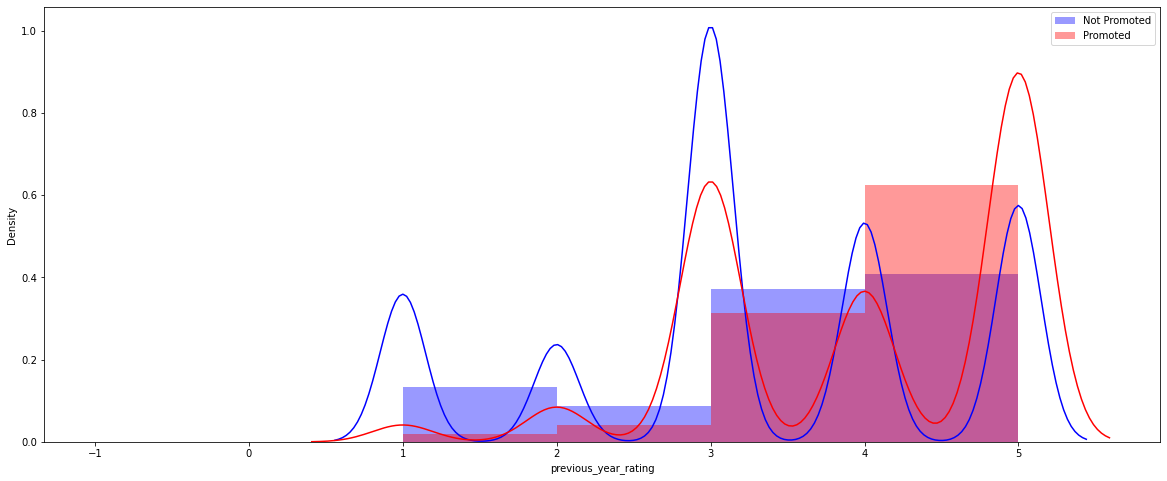

In [17]:
plt.figure(figsize=(20,8))
sns.distplot(data['previous_year_rating'][data['is_promoted'] == 0], bins=[-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0], color='b', label='Not Promoted')
sns.distplot(data['previous_year_rating'][data['is_promoted'] == 1], bins=[-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0], color='r', label='Promoted')
plt.legend();

Dari visualisasi terlihat bahwa rata-rata karyawan yang mendapatkan promosi adalah karyawan yang mendapatkan rating penghargaan 4 sampai 5 selama bekerja

#### Visualisasi hubungan Masa kerja karyawan dengan promosi karyawan

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


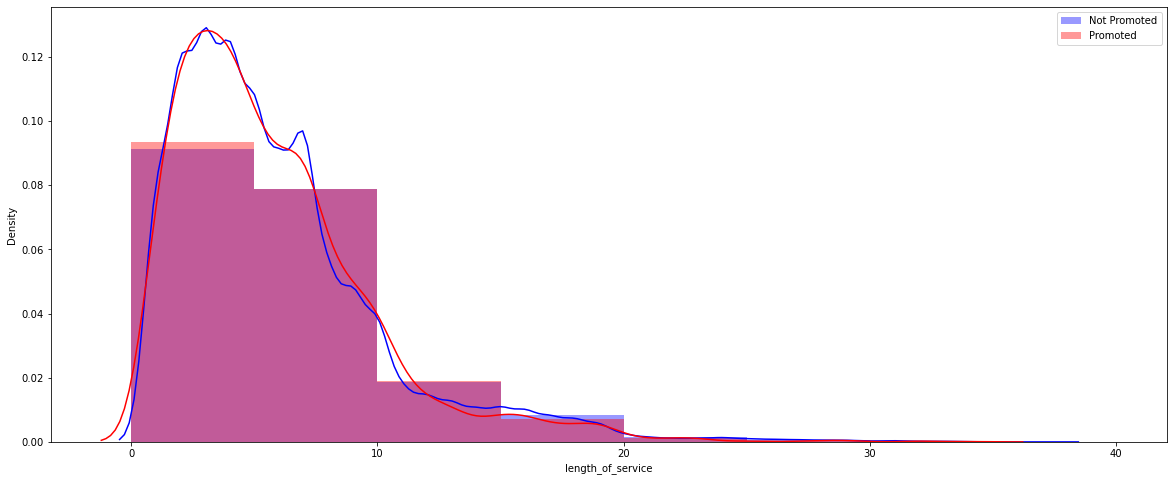

In [18]:
plt.figure(figsize=(20,8))
sns.distplot(data['length_of_service'][data['is_promoted'] == 0], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40], color='b', label='Not Promoted')
sns.distplot(data['length_of_service'][data['is_promoted'] == 1], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40], color='r', label='Promoted')
plt.legend();

Dari visualisasi terlihat bahwa rata-rata karyawan yang mendapatkan promosi adalah karyawan yang telah bekerja dalam rentan 1 sampai 5 tahun

#### Visualisasi  hubungn KPI's Karyawan dengan nilai diatas 80% dengan promosi karyawan

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


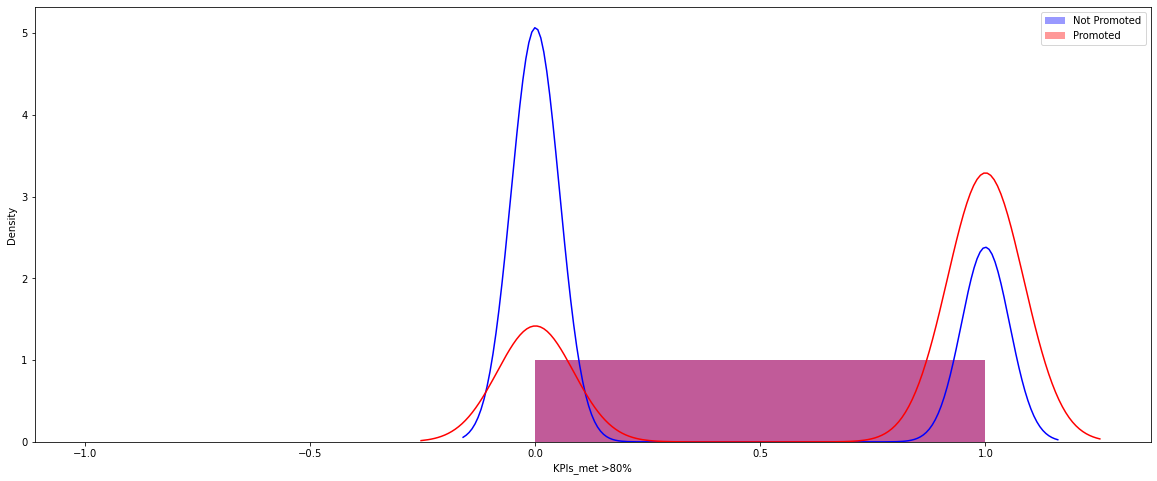

In [19]:
plt.figure(figsize=(20,8))
sns.distplot(data['KPIs_met >80%'][data['is_promoted'] == 0], bins=[-1 , 0, 1], color='b', label='Not Promoted')
sns.distplot(data['KPIs_met >80%'][data['is_promoted'] == 1], bins=[-1 , 0, 1], color='r', label='Promoted')
plt.legend();

Dari visualisasi terlihat bahwa rata-rata karyawan yang mendapatkan promosi adalah karyawan yang mendapatkan nilai KPI diatas 80%

#### Visualisasi hubungan penghargaan yang diterima karyawan dengan promosi karyawan

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


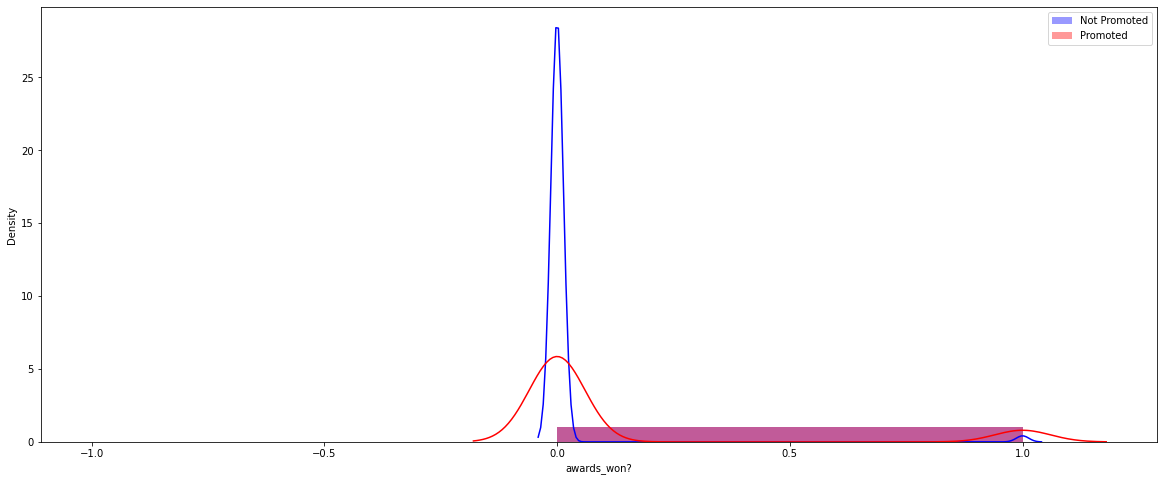

In [20]:
plt.figure(figsize=(20,8))
sns.distplot(data['awards_won?'][data['is_promoted'] == 0], bins=[-1 , 0, 1], color='b', label='Not Promoted')
sns.distplot(data['awards_won?'][data['is_promoted'] == 1], bins=[-1 , 0, 1], color='r', label='Promoted')
plt.legend();

Dari visualisasi terlihat bahwa rata-rata karyawan yang mendapatkan promosi adalah seimbang antara yang pernah mendapatkan penghargaan dan yang belum pernah mendapatkan penghargaan dari perusahaan

#### Visualisasi hubungan rata-rata angka training yang diperoleh karyawan dengan promosi karyawan

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


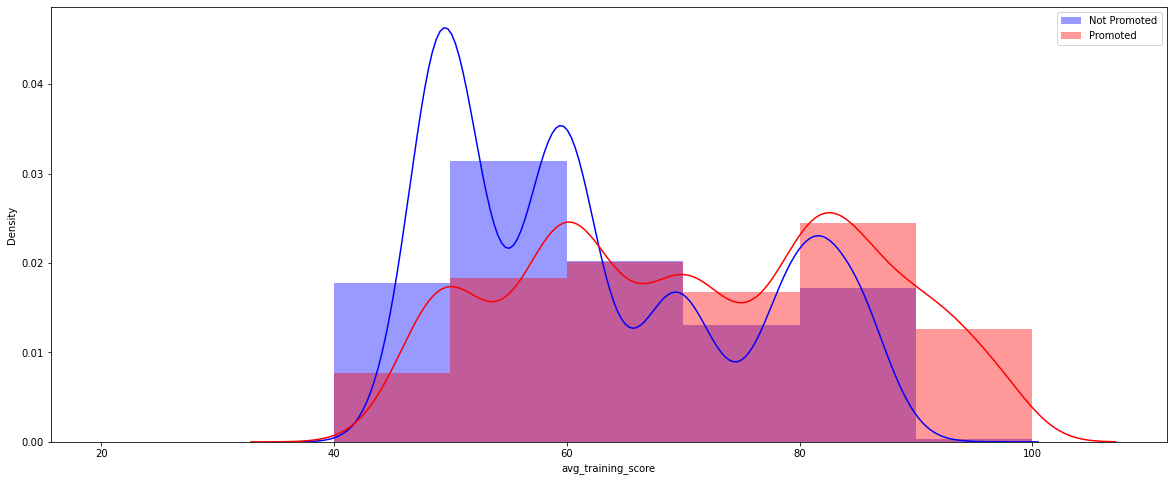

In [21]:
plt.figure(figsize=(20,8))
sns.distplot(data['avg_training_score'][data['is_promoted'] == 0], bins=[20, 30, 40, 50, 60, 70, 80, 90, 100], color='b', label='Not Promoted')
sns.distplot(data['avg_training_score'][data['is_promoted'] == 1], bins=[20, 30, 40, 50, 60, 70, 80, 90, 100], color='r', label='Promoted')
plt.legend();

Dari visualisasi terlihat bahwa rata-rata nilai training karyawan yang mendapatkan promosi adalah karyawan yang mendapatkan rentang nilai 70 sampai dengan 100 dalam training

## Visualisasi Categorical Features

In [22]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes=='O']

print("Jumlah Categorical features {}".format(len(categorical_features)))

Jumlah Categorical features 5


In [23]:
categorical_features

['department', 'region', 'education', 'gender', 'recruitment_channel']

#### Visualisasi hubungan departemen dengan promosi karyawan

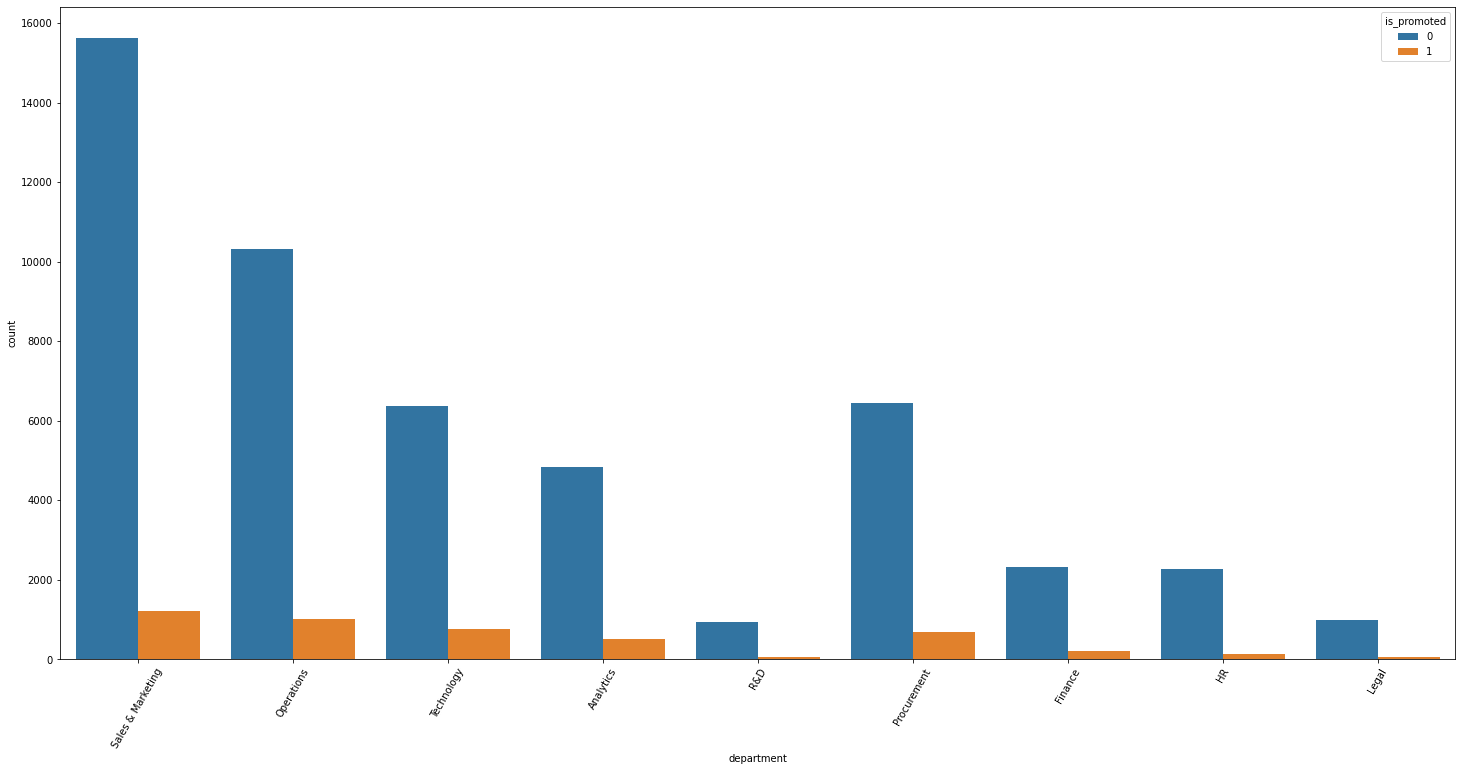

In [24]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'department', hue = 'is_promoted', data = data);
plt.xticks(rotation = 60);

Dari Visualisasi terlihat bahwa karyawan pada departemen Sales & Marketing, Operations, Technology, Analytics dan procurement mendapatkan rata-rata promosi tertinggi

#### Visualisasi hubungan region dengan promosi karyawan

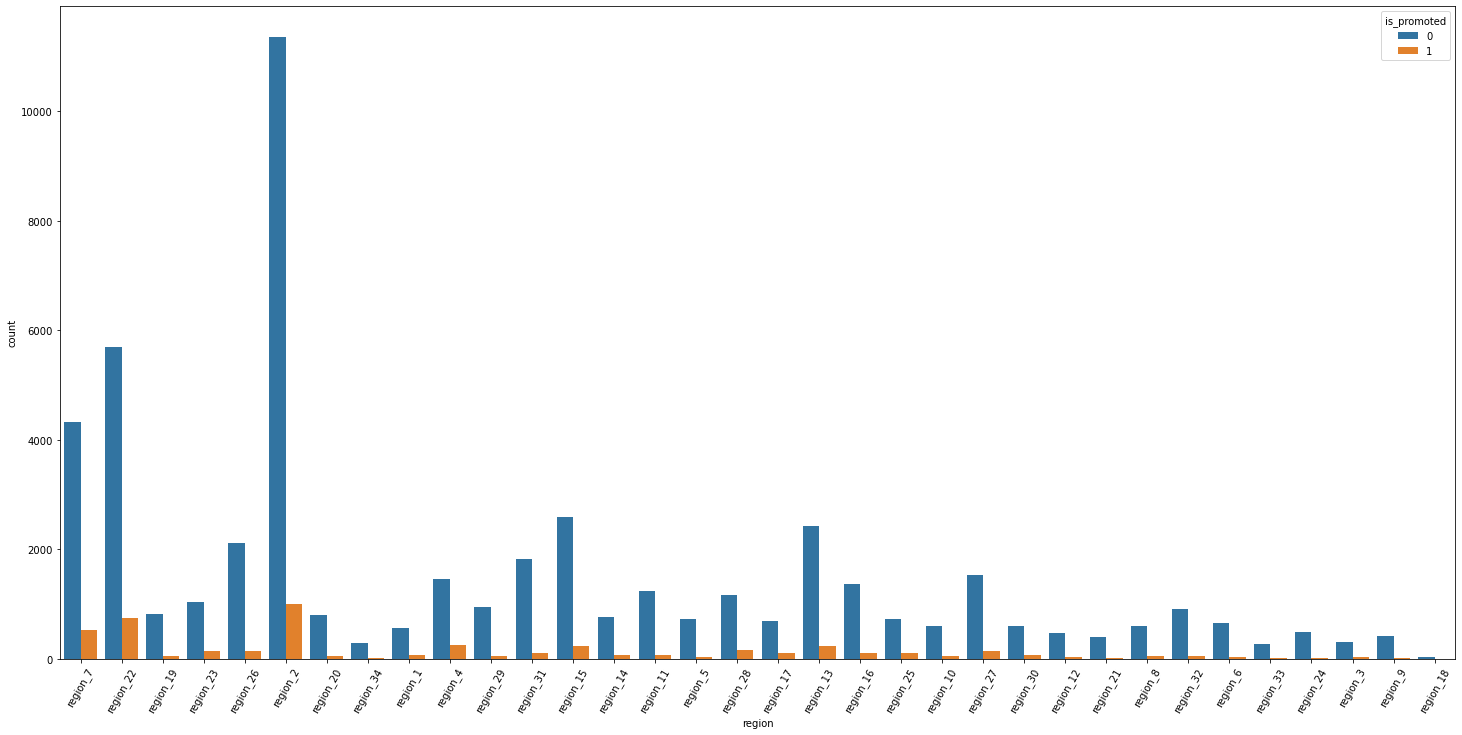

In [25]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'region', hue = 'is_promoted', data = data);
plt.xticks(rotation = 60);

Dari Visualisasi terlihat bahwa pada region_2, region_22, dan region_7 mendapatkan rata-rata promosi tertinggi

#### visualisasi hubungan latar belakang pendidikan karyawan dengan promosi karyawan 

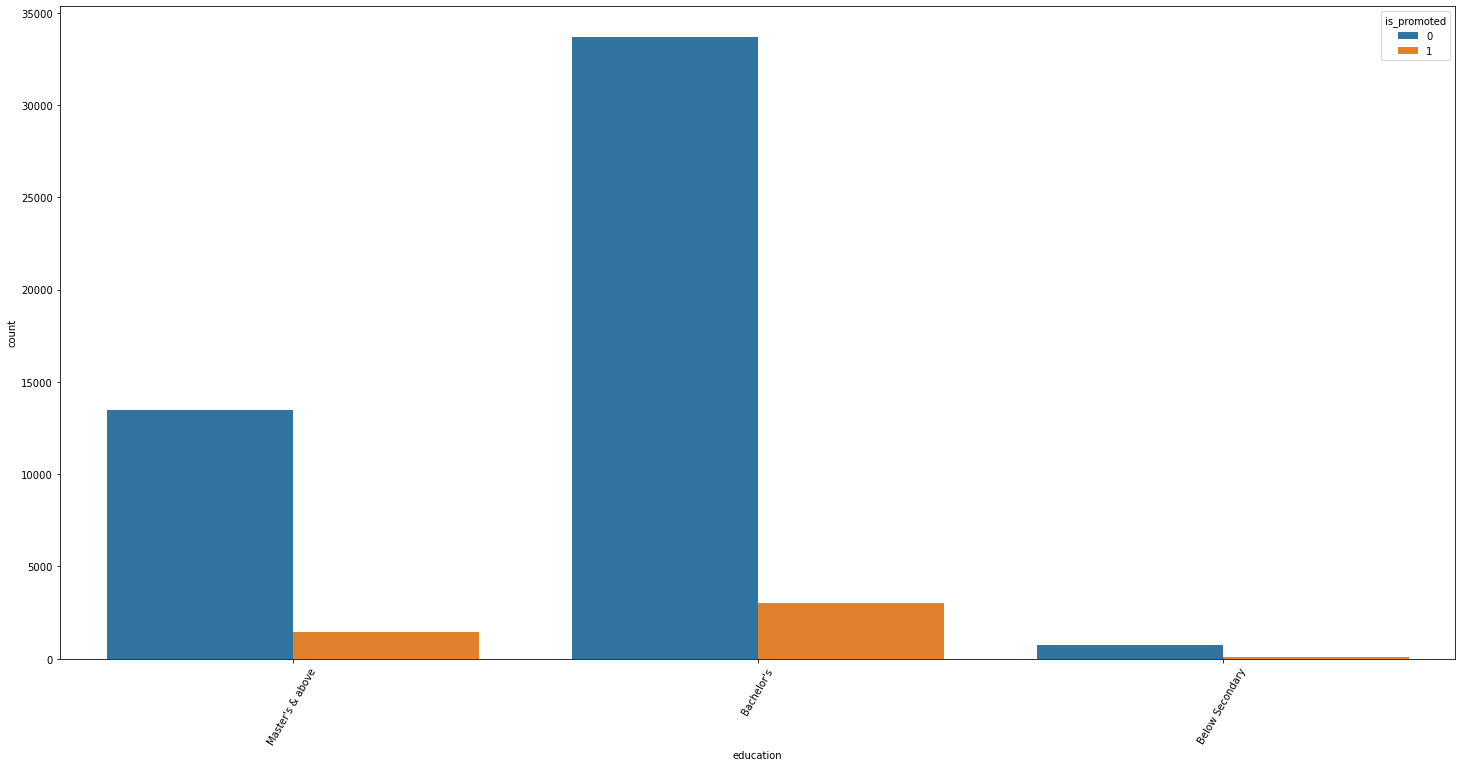

In [26]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'education', hue = 'is_promoted', data = data);
plt.xticks(rotation = 60);

Dari Visualisasi terlihat bahwa karyawan dengan latar belakang pendidikan sarjana mendapatkan rata-rata promosi tertinggi

#### visualisasi hubungan latar belakang jenis kelamin karyawan dengan promosi karyawan 

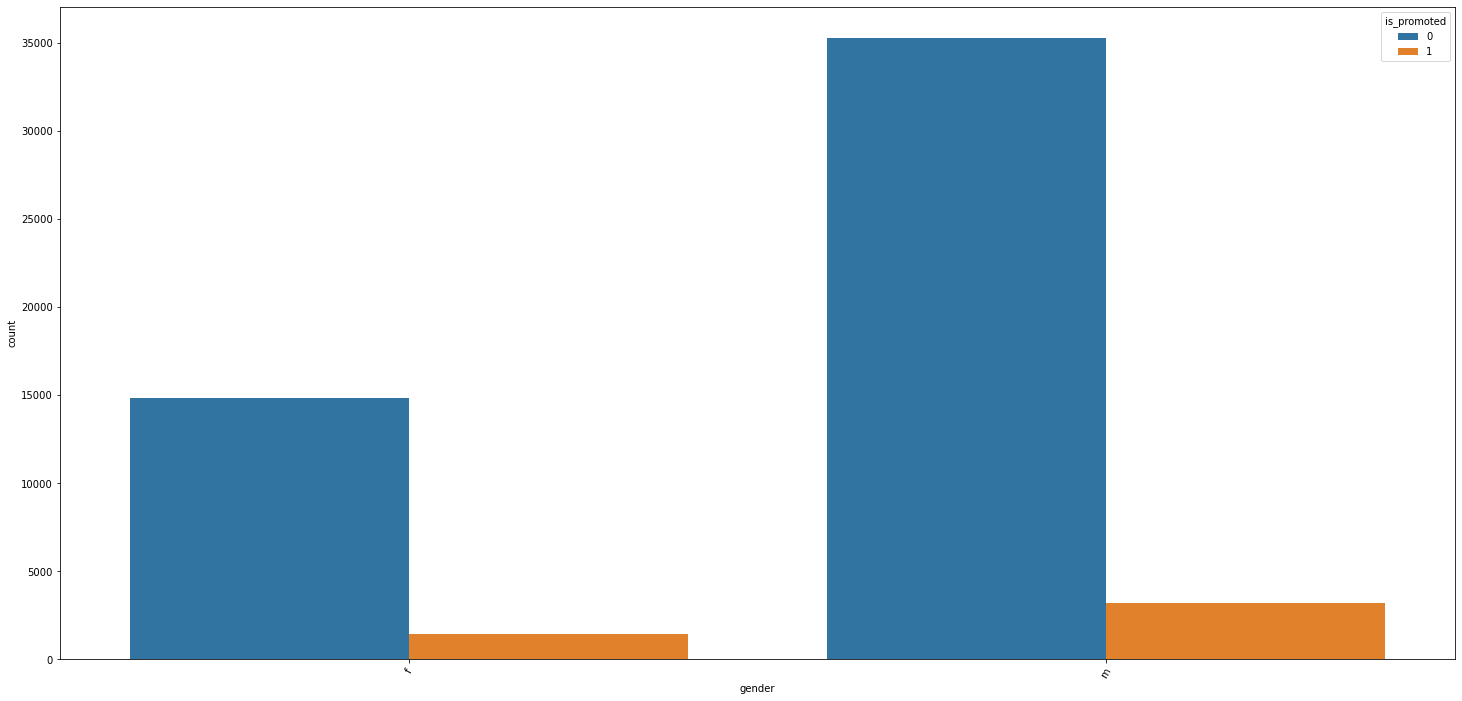

In [27]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'gender', hue = 'is_promoted', data = data);
plt.xticks(rotation = 60);

Dari Visualisasi terlihat bahwa karyawan dengan gender pria mendapatkan rata-rata promosi tertinggi

#### visualisasi hubungan rekrutmen channel dengan promosi karyawan

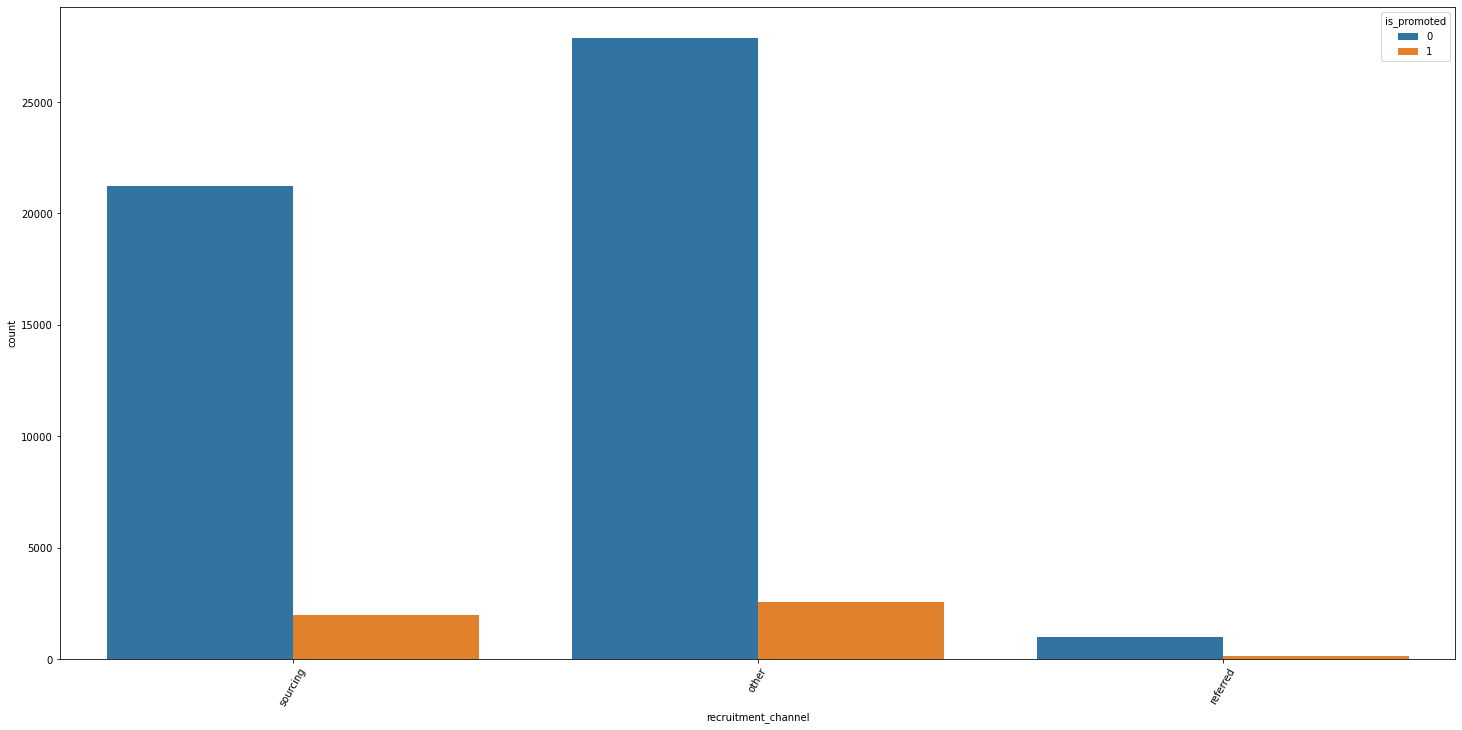

In [28]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'recruitment_channel', hue = 'is_promoted', data = data);
plt.xticks(rotation = 60);

Dari Visualisasi terlihat bahwa karyawan dengan channel rekrutmen other mendapatkan rata-rata promosi tertinggi

### Cardinality of Categorical Variables

In [29]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature, len(data[feature].unique())))

The feature is department and number of categories are 9
The feature is region and number of categories are 34
The feature is education and number of categories are 4
The feature is gender and number of categories are 2
The feature is recruitment_channel and number of categories are 3


dari data terlihat bahwa feature region memiliki kardinalitas yang tinggi

### Hasil Exploratory Data Analysis

dari hasil visualisasi diperoleh informasi sebagai berikut:
* Dari Visualisasi terlihat bahwa karyawan yang mendapatkan promosi sebanyak 4668 orang (8,5%) sedangkan yang tidak mendapatkan promosi sebanyak 50140 orang (91.5%)
* Dari visualisasi terlihat bahwa usia rata-rata yang mendapatkan promosi berada pada range usia 30 sampai dengan 40 tahun
* Dari visualisasi terlihat bahwa selama rata-rata karyawan yang mendapatkan promosi adalah karyawan yang mendapatkan training 1 sampai 2 kali
* Dari visualisasi terlihat bahwa rata-rata karyawan yang mendapatkan promosi adalah karyawan yang mendapatkan rating penghargaan 4 sampai 5 selama bekerja
* Dari visualisasi terlihat bahwa rata-rata karyawan yang mendapatkan promosi adalah karyawan yang telah bekerja dalam rentan 1 sampai 5 tahun
* Dari visualisasi terlihat bahwa rata-rata karyawan yang mendapatkan promosi adalah karyawan yang mendapatkan nilai KPI diatas 80%
* Dari visualisasi terlihat bahwa rata-rata karyawan yang mendapatkan promosi adalah seimbang antara yang pernah mendapatkan penghargaan dan yang belum pernah mendapatkan penghargaan dari perusahaan
* Dari visualisasi terlihat bahwa selama rata-rata karyawan yang mendapatkan promosi adalah karyawan yang mendapatkan training 1 sampai 2 kali
* Dari visualisasi terlihat bahwa rata-rata karyawan yang mendapatkan promosi adalah karyawan yang mendapatkan rating penghargaan 4 sampai 5 selama bekerja
* Dari visualisasi terlihat bahwa rata-rata karyawan yang mendapatkan promosi adalah karyawan yang telah bekerja dalam rentan 1 sampai 5 tahun
* Dari visualisasi terlihat bahwa rata-rata karyawan yang mendapatkan promosi adalah karyawan yang mendapatkan nilai KPI diatas 80%
* Dari visualisasi terlihat bahwa rata-rata karyawan yang mendapatkan promosi adalah seimbang antara yang pernah mendapatkan penghargaan dan yang belum pernah mendapatkan penghargaan dari perusahaan
* Dari visualisasi terlihat bahwa rata-rata nilai training karyawan yang mendapatkan promosi adalah karyawan yang mendapatkan rentang nilai 70 sampai dengan 100 dalam training
* Dari Visualisasi terlihat bahwa karyawan pada departemen Sales & Marketing, Operations, Technology, Analytics dan procurement mendapatkan rata-rata promosi tertinggi
* Dari Visualisasi terlihat bahwa pada region_2, region_22, dan region_7 mendapatkan rata-rata promosi tertinggi
* Dari Visualisasi terlihat bahwa karyawan dengan latar belakang pendidikan sarjana mendapatkan rata-rata promosi tertinggi
* Dari Visualisasi terlihat bahwa karyawan dengan gender pria mendapatkan rata-rata promosi tertinggi
* Dari Visualisasi terlihat bahwa karyawan dengan channel rekrutmen other mendapatkan rata-rata promosi tertinggi

# Data Preprocessing

#### Membagi data terlebih dahulu sebelum menerapkan Rekayasa Fitur (Feature Engineering)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data, data['is_promoted'],test_size=0.1,random_state=0)

untuk menghindari adanya kemungkinan kebocoran data sehingga kita perlu membagi data terlebih dahulu dan kemudian menerapkan fitur engineering

## Features Engineering

#### Mempersiapkan data untuk dilakukan feature engineering

In [31]:
df = X_train

menggunakan data training untuk dilakukan fitur engineering

In [32]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
33708,48641,Operations,region_4,Bachelor's,f,sourcing,1,27,NaN,1,0,0,62,0
30048,5884,Operations,region_31,Bachelor's,m,other,1,35,4.0,10,0,0,74,1
20726,69568,Sales & Marketing,region_13,Bachelor's,m,sourcing,2,37,3.0,10,0,0,49,0
27407,26039,HR,region_10,Master's & above,m,sourcing,1,36,5.0,4,1,0,51,0
10397,11086,Procurement,region_20,Master's & above,f,other,1,36,1.0,10,0,0,72,0


#### melihat informasi data

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49327 entries, 33708 to 2732
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   employee_id              49327 non-null  int64  
 1   department               49327 non-null  object 
 2   region                   49327 non-null  object 
 3   education                47137 non-null  object 
 4   gender                   49327 non-null  object 
 5   recruitment_channel      49327 non-null  object 
 6   no_of_trainings          49327 non-null  int64  
 7   age                      49327 non-null  int64  
 8   previous_year_rating     45615 non-null  float64
 9   length_of_service        49327 non-null  int64  
 10  KPIs_met >80%            49327 non-null  int64  
 11  awards_won?              49327 non-null  int64  
 12  avg_training_score       49327 non-null  int64  
 13  is_promoted              49327 non-null  int64  
 14  training_score_prom

features baru tersebut untuk melihat data karyawan yang benar-benar mendapatkan promosi

#### Menghapus fitur

In [35]:
df = df.drop('employee_id', axis=1)

melalukan drop untuk fitur 'employee_id' karena tidak berpengaruh dalam proses training model 

#### Melihat Columns Data

In [36]:
for col in df.columns:
    print(col, df[col].unique()[0:30], "\n")

department ['Operations' 'Sales & Marketing' 'HR' 'Procurement' 'Technology' 'Legal'
 'Analytics' 'Finance' 'R&D'] 

region ['region_4' 'region_31' 'region_13' 'region_10' 'region_20' 'region_24'
 'region_27' 'region_29' 'region_1' 'region_7' 'region_2' 'region_22'
 'region_16' 'region_26' 'region_28' 'region_11' 'region_12' 'region_15'
 'region_5' 'region_25' 'region_6' 'region_19' 'region_23' 'region_34'
 'region_9' 'region_33' 'region_30' 'region_8' 'region_3' 'region_32'] 

education ["Bachelor's" "Master's & above" 'Below Secondary' nan] 

gender ['f' 'm'] 

recruitment_channel ['sourcing' 'other' 'referred'] 

no_of_trainings [ 1  2  5  3  4  6  8  7 10  9] 

age [27 35 37 36 30 33 31 29 28 52 41 45 40 47 32 54 50 26 38 23 56 34 42 58
 55 39 44 43 25 53] 

previous_year_rating [nan  4.  3.  5.  1.  2.] 

length_of_service [ 1 10  4  6  3  7 21  5  8 15  2  9 20 11 28 13 12 14 23 24 16 26 17 19
 18 29 27 22 25 31] 

KPIs_met >80% [0 1] 

awards_won? [0 1] 

avg_training_score [62 

### Missing Values

#### membuat list categorical features yang terdapat  missing values

In [37]:
categories_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in categories_nan:
    print('{} : {} % missing values'.format(feature, np.round(df[feature].isnull().mean(),4)))

education : 0.0444 % missing values


#### mengatasi missing values categorical dengan "Missing"

In [38]:
def replace_cat_feature(df, categories_nan):
    dataset = df.copy()
    dataset[categories_nan]=dataset[categories_nan].fillna('Missing')
    return dataset

df = replace_cat_feature(df, categories_nan)
df[categories_nan].isnull().sum()

education    0
dtype: int64

#### membuat list numerical features yang terdapat  missing values

In [39]:
numerical_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O' ]

for feature in numerical_nan:
    print('{}: {} % missing values'.format(feature, np.round(df[feature].isnull().mean(),4)))

previous_year_rating: 0.0753 % missing values


#### mengatasi missing values numerical dengan nilai median

In [40]:
for feature in numerical_nan:
    median_feature = df[feature].median()
    df[feature].fillna(median_feature, inplace=True)   

#### mengecek missing values 

In [41]:
df.isnull().sum()

department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
training_score_promoted    0
dtype: int64

### Melakukan proses binning

In [42]:
df['age'] = pd.cut(df['age'], [19 , 25 , 30, 35 , 40 , 45 , 50 , 55, 60 ], labels=[1,2,3,4,5,6,7,8]).astype('int64')
df['length_of_service'] = pd.cut(df['length_of_service'], [-0.1 , 5, 10, 15, 20, 25, 30, 35, 40], labels=[1,2,3,4,5,6,7,8]).astype('int64')
df['avg_training_score'] = pd.cut(df['avg_training_score'], [20, 30, 40, 50, 60, 70, 80, 90, 100], labels=[1,2,3,4,5,6,7,8]).astype('int64')
df['previous_year_rating'] = pd.cut(df['previous_year_rating'], [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0], labels=[1,2,3,4,5,6,]).astype('int64')

proses binning dilakukan dengan mengelompokkan data numeric ke dalam bagian-bagian yang lebih kecil agar sebaran data lebih mudah dipahami

### Mengatasi High Cardinality

In [43]:
df.region.value_counts().sort_values(ascending=False).head(20)

region_2     11149
region_22     5766
region_7      4365
region_15     2514
region_13     2368
region_26     2046
region_31     1743
region_4      1533
region_27     1478
region_16     1307
region_28     1195
region_11     1174
region_23     1065
region_29      884
region_32      846
region_19      787
region_14      760
region_20      756
region_25      744
region_17      717
Name: region, dtype: int64

In [44]:
top_5_labels = [y for y in df.region.value_counts().sort_values(ascending=False).head(5).index]
top_5_labels

['region_2', 'region_22', 'region_7', 'region_15', 'region_13']

In [45]:
def one_hot_encoding_top_x(df, variable, top_x_labels):    
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(df[variable]==label, 1, 0)

In [46]:
one_hot_encoding_top_x(df, 'region', top_5_labels)

In [47]:
df = df.drop('region', axis=1)
df.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,training_score_promoted,region_region_2,region_region_22,region_region_7,region_region_15,region_region_13
33708,Operations,Bachelor's,f,sourcing,1,2,4,1,0,0,5,0,False,0,0,0,0,0
30048,Operations,Bachelor's,m,other,1,3,5,2,0,0,6,1,False,0,0,0,0,0
20726,Sales & Marketing,Bachelor's,m,sourcing,2,4,4,2,0,0,3,0,False,0,0,0,0,1
27407,HR,Master's & above,m,sourcing,1,4,6,1,1,0,4,0,False,0,0,0,0,0
10397,Procurement,Master's & above,f,other,1,4,2,2,0,0,6,0,False,0,0,0,0,0


### Mengubah categorical menjadi numerical

In [48]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes=='O']

In [49]:
bool_features = [feature for feature in df.columns if df[feature].dtypes=='bool']

In [50]:
for feature in categorical_features:
    labels_ordered = df.groupby([feature])['is_promoted'].mean().sort_values().index
    labels_ordered = {k:i for i,k in enumerate(labels_ordered,0)}
    df[feature] = df[feature].map(labels_ordered)

In [51]:
for feature in bool_features:
    labels_ordered = df.groupby([feature])['is_promoted'].mean().sort_values().index
    labels_ordered = {k:i for i,k in enumerate(labels_ordered,0)}
    df[feature] = df[feature].map(labels_ordered)

In [52]:
df.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,training_score_promoted,region_region_2,region_region_22,region_region_7,region_region_15,region_region_13
33708,5,1,1,1,1,2,4,1,0,0,5,0,0,0,0,0,0,0
30048,5,1,0,0,1,3,5,2,0,0,6,1,0,0,0,0,0,0
20726,2,1,0,1,2,4,4,2,0,0,3,0,0,0,0,0,0,1
27407,1,3,0,1,1,4,6,1,1,0,4,0,0,0,0,0,0,0
10397,7,3,1,0,1,4,2,2,0,0,6,0,0,0,0,0,0,0


#### Melihat Columns Data setelah dilakukan proses Features Engineering

In [53]:
for col in df.columns:
    print(col, df[col].unique(), '\n')

department [5 2 1 7 8 0 6 4 3] 

education [1 3 2 0] 

gender [1 0] 

recruitment_channel [1 0 2] 

no_of_trainings [ 1  2  5  3  4  6  8  7 10  9] 

age [2 3 4 7 5 6 1 8] 

previous_year_rating [4 5 6 2 3] 

length_of_service [1 2 5 3 4 6 7 8] 

KPIs_met >80% [0 1] 

awards_won? [0 1] 

avg_training_score [5 6 3 4 7 8 2] 

is_promoted [0 1] 

training_score_promoted [0 1] 

region_region_2 [0 1] 

region_region_22 [0 1] 

region_region_7 [0 1] 

region_region_15 [0 1] 

region_region_13 [0 1] 



## Feature Selection

In [54]:
X_train = df.drop(['is_promoted'],axis=1)
y_train = df[['is_promoted']]

In [55]:
feature_sel_model = RandomForestClassifier(random_state=42) 
feature_sel_model.fit(X_train, y_train)

<ipython-input-55-fe378343564d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  feature_sel_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

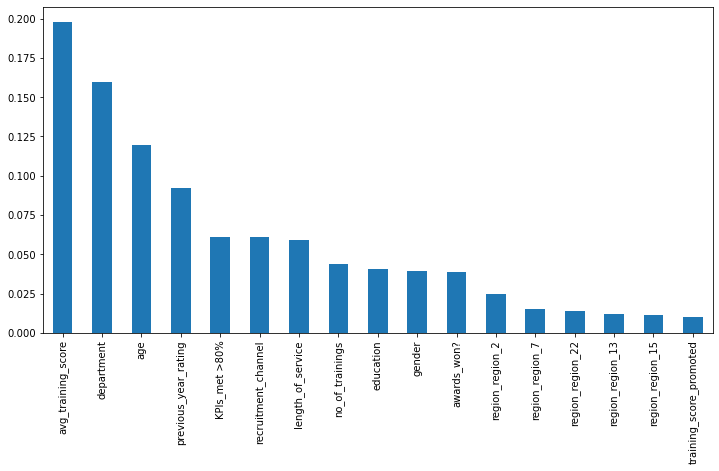

In [56]:
importance = pd.Series(feature_sel_model.feature_importances_)
importance.index = df.drop('is_promoted', axis=1).columns
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(12,6));

In [57]:
importance = pd.Series(feature_sel_model.feature_importances_)
importance.index = df.drop('is_promoted', axis=1).columns
importance.sort_values(inplace=True, ascending=False)
importance

avg_training_score         0.197635
department                 0.159773
age                        0.119276
previous_year_rating       0.092126
KPIs_met >80%              0.061013
recruitment_channel        0.060888
length_of_service          0.059000
no_of_trainings            0.043768
education                  0.040529
gender                     0.039149
awards_won?                0.038997
region_region_2            0.024841
region_region_7            0.015296
region_region_22           0.014203
region_region_13           0.012090
region_region_15           0.011098
training_score_promoted    0.010317
dtype: float64

In [58]:
features_importance = importance[0:12]

print("Features Importance:")
print(features_importance)
print("\n")
print("Persentase Features Importance:")
print(np.round(features_importance.sum(),2))
print("\n")
print("Features Importance Index:")
print(features_importance.index )

Features Importance:
avg_training_score      0.197635
department              0.159773
age                     0.119276
previous_year_rating    0.092126
KPIs_met >80%           0.061013
recruitment_channel     0.060888
length_of_service       0.059000
no_of_trainings         0.043768
education               0.040529
gender                  0.039149
awards_won?             0.038997
region_region_2         0.024841
dtype: float64


Persentase Features Importance:
0.94


Features Importance Index:
Index(['avg_training_score', 'department', 'age', 'previous_year_rating',
       'KPIs_met >80%', 'recruitment_channel', 'length_of_service',
       'no_of_trainings', 'education', 'gender', 'awards_won?',
       'region_region_2'],
      dtype='object')


### Menentukan Features pilihan

In [59]:
col_to_use = ['avg_training_score', 'age', 'length_of_service', 'department',
       'previous_year_rating', 'KPIs_met >80%', 'recruitment_channel',
       'awards_won?', 'no_of_trainings', 'gender', 'education',
       'region_region_2', 'is_promoted']

pemilihan data untuk dilakukan proses modeling dan training dilakukan dengan memilih data terbaik yang mencangkup 95% dari data 

In [60]:
dataset = df.copy()
dataset = df[col_to_use]
dataset.head()

,avg_training_score,age,length_of_service,department,previous_year_rating,KPIs_met >80%,recruitment_channel,awards_won?,no_of_trainings,gender,education,region_region_2,is_promoted
33708,5,2,1,5,4,0,1,0,1,1,1,0,0
30048,6,3,2,5,5,0,0,0,1,0,1,0,1
20726,3,4,2,2,4,0,1,0,2,0,1,0,0
27407,4,4,1,1,6,1,1,0,1,0,3,0,0
10397,6,4,2,7,2,0,0,0,1,1,3,0,0


# Modeling Pipeline (Pendefinisian dan Pelatihan Model)

untuk melakukan kalsifikasi terhadap data karyawan menggunakan 3 model classifier yang berbeda yaitu:
* model linear yaitu Logistic Regression classifier Model untuk melakukan memprediksi nilai probabilitas yang dipetakan ke dua kelas (klasifikasi biner).
* model neighbors yaitu KNeighborsClassifier untuk mengimplemetasikan klasifikasi berdasarkan pemilihan the k-nearest neighbors.
* model ensembel yaitu RandomForestClassifier dimana Penentuan klasifikasi dengan random forest diambil berdasarkan hasil voting dari tree yang terbentuk

untuk parameter yang digunakan adalah parameter default untuk melihat kemampuan dasar dari tiap algoritma untuk melakukan klasifikasi

In [61]:
# Menentukan Variabel Bebas (X) dan Variabel terikat (y
X = dataset.drop(['is_promoted'], axis=1)
y = dataset['is_promoted']

# mengatasi imbalaced data dengan smote oversampling
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

# split data
X_train, X_val, y_train, y_val = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)


# Creating a preprocessing and modelling pipeline
logreg_model = Pipeline(steps=[("model", LogisticRegression(random_state=42))])

knn_model = Pipeline(steps=[("model", KNeighborsClassifier())])

rfc_model = Pipeline(steps=[("model", RandomForestClassifier(random_state=42))])


# Fit model LogisticRegression
logreg_model.fit(X_train, y_train)

# Fit model KNeighbors Classifier
knn_model.fit(X_train, y_train)

# Fit model Random Forest Classifier
rfc_model.fit(X_train, y_train)

# model scores
print('Logistic Regression score: \n', np.round(logreg_model.score(X_val, y_val),2))
print("\n")
print('KNeighbors Classifier score: \n', np.round(knn_model.score(X_val, y_val),2))
print("\n")
print('Random Forest Classifier score: \n', np.round(rfc_model.score(X_val, y_val),2))

Logistic Regression score: 
 0.72


KNeighbors Classifier score: 
 0.84


Random Forest Classifier score: 
 0.88


# Model Evaluation

Logisctic Regression : 
              precision    recall  f1-score   support

           0       0.73      0.70      0.72     13605
           1       0.71      0.74      0.73     13463

    accuracy                           0.72     27068
   macro avg       0.72      0.72      0.72     27068
weighted avg       0.72      0.72      0.72     27068

KNeighbors Classifier : 
              precision    recall  f1-score   support

           0       0.90      0.77      0.83     13605
           1       0.80      0.91      0.85     13463

    accuracy                           0.84     27068
   macro avg       0.85      0.84      0.84     27068
weighted avg       0.85      0.84      0.84     27068

Random Forest Classifier : 
              precision    recall  f1-score   support

           0       0.92      0.83      0.87     13605
           1       0.84      0.93      0.88     13463

    accuracy                           0.88     27068
   macro avg       0.88      0.88      0.88     270

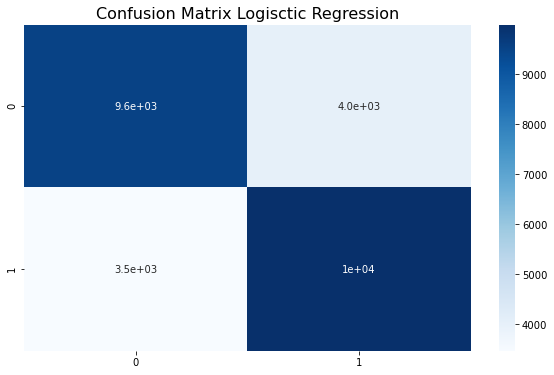

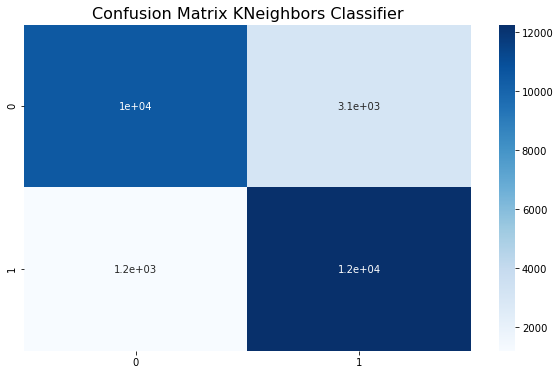

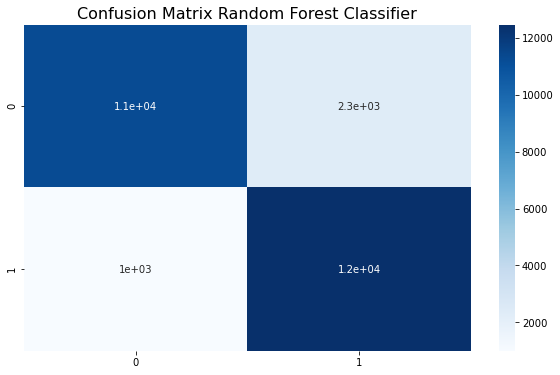

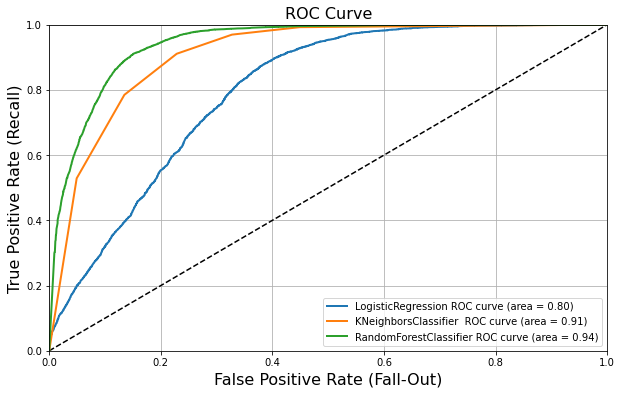

In [62]:
# evaluation model logistic
y_preds_log = logreg_model.predict(X_val)

print("Logisctic Regression : ")
print(classification_report(y_val , y_preds_log))

# evaluation model KNeighbors Classifier
y_preds_knn = knn_model.predict(X_val)

print("KNeighbors Classifier : ")
print(classification_report(y_val, y_preds_knn))

# evaluation model Random Forest Classifier
y_preds_rfc = rfc_model.predict(X_val)

print("Random Forest Classifier : ")
print(classification_report(y_val, y_preds_rfc))

# Confusion Matrix Logisctic Regression
log = confusion_matrix(y_val, y_preds_log)
plt.figure(figsize=(10, 6))
plt.title("Confusion Matrix Logisctic Regression", size=16)
sns.heatmap(log, annot=True, cmap="Blues")

# Confusion Matrix KNeighbors Classifier
knn = confusion_matrix(y_val, y_preds_knn)
plt.figure(figsize=(10, 6))
plt.title("Confusion Matrix KNeighbors Classifier", size=16)
sns.heatmap(knn, annot=True, cmap="Blues")

# Confusion Matrix Random Forest Classifier
rfc = confusion_matrix(y_val, y_preds_rfc)
plt.figure(figsize=(10, 6))
plt.title("Confusion Matrix Random Forest Classifier", size=16)
sns.heatmap(rfc, annot=True, cmap="Blues")

# ROC Curve
plt.figure(figsize=(10, 6))
plt.title("ROC Curve", size=16)
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
labels=['LogisticRegression', 'KNeighborsClassifier ', 'RandomForestClassifier']
for idx,model in enumerate([logreg_model, knn_model, rfc_model]):
    y_scores = model.predict_proba(X_val)
    fpr, tpr, thresholds = roc_curve(y_val, y_scores[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2,label=labels[idx] + ' ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right");

keterangan:

* Accuracy = Keakuratan model dalam bentuk desimal. Akurasi sempurna sama dengan 1,0.
* Precision = Menunjukkan kemampuan pengklasifikasi untuk tidak memberi label positif pada sampel yang negatif (tp / (tp + fp)). Sebuah model yang tidak menghasilkan positif palsu memiliki presisi 1,0.
* Recall = Menunjukkan kemampuan pengklasifikasi untuk menemukan semua sampel positif (tp / (tp + fn)). Sebuah model yang tidak menghasilkan negatif palsu memiliki recall 1,0.
* ROC = perbandingan antara true positive rate (tpr) model dan false positive rate (fpr). Model yang sempurna mencapai skor AUC 1,0.

# Model Evaluation

dari hasil evaluasi perbandingan antar 3 model klasifikasi yatu model Logistic regression, model KNeighbors Classifier, dan model **Random Forest classifier** maka model yang terpilih adalah model Random Forest classifier karena memiliki **f1-score** terbaik yaitu **0.88** dan **ROC Curve sebesar 0.94** 

# Model Improvement

model improvement akan dilakukan dengan menggunakan GridSearchCV terhadap model terpilih yaitu Random Forest Classifier untuk mendapatkankan parameter terbaik

parameter yang diuji adalah:
* jumlah trees (n_estimators) yang berjumlah 50, 100, dan 200
* Jumlah fitur yang perlu dipertimbangkan saat mencari split terbaik (max_features) yang berjumlah 1, 2, 3

In [63]:
pipe = Pipeline([('classifier', RandomForestClassifier())])

param_grid = [
    {'classifier': [RandomForestClassifier(n_estimators=100)],
     'classifier__n_estimators': [50, 100, 200] ,'classifier__max_features': [1, 2, 3]
    }]

grid_model = GridSearchCV(pipe, param_grid, cv=5)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier())]),
             param_grid=[{'classifier': [RandomForestClassifier(max_features=2,
                                                                n_estimators=200)],
                          'classifier__max_features': [1, 2, 3],
                          'classifier__n_estimators': [50, 100, 200]}])

In [64]:
print("Best estimator:\n{}".format(grid_model.best_estimator_))

Best estimator:
Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_features=2, n_estimators=200))])


In [65]:
print("Best cross-validation score: {:.2f}".format(grid_model.best_score_))
print("Test-set score: {:.2f}".format(grid_model.score(X_val, y_val)))

Best cross-validation score: 0.87
Test-set score: 0.88


Random Forest Classifier : 
              precision    recall  f1-score   support

           0       0.92      0.83      0.87     13605
           1       0.85      0.92      0.88     13463

    accuracy                           0.88     27068
   macro avg       0.88      0.88      0.88     27068
weighted avg       0.88      0.88      0.88     27068

ROC Curve : 


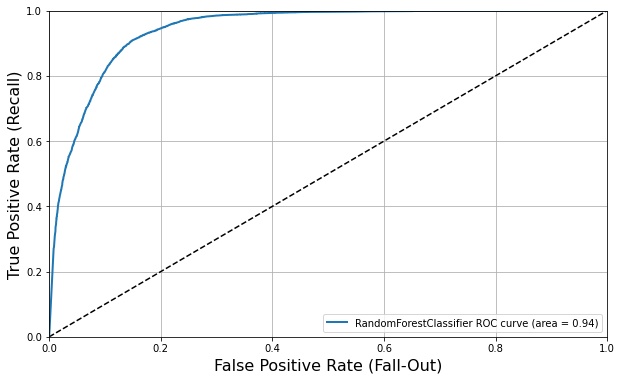

In [66]:
# evaluation model Random Forest Classifier
y_preds_grid = grid_model.predict(X_val)

print("Random Forest Classifier : ")
print(classification_report(y_val, y_preds_grid))

# ROC Curve
print("ROC Curve : ")
plt.figure(figsize=(10, 6))                                    
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
labels=['RandomForestClassifier']
for idx,model in enumerate([grid_model]):
    y_scores = model.predict_proba(X_val)
    fpr, tpr, thresholds = roc_curve(y_val, y_scores[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2,label=labels[idx] + ' ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right");

### Analysis Model Improvement

dari hasil model improvement dengan menggunakan GridSearchCV didapatkan best parameter sebagai berikut:
    
* Jumlah n_estimators adalah 200
* jumlah max_features adalah 2

dengan nilai evaluasi performa:

* menghasilkan score akurasi sebesar 0.88
* menghasilkan score f1-score sebesar 0.89
* menghasilkan ROC score sebesar 0.94

# Model Saving 

model terbaik yang akan disimpan adalah model RandomForestClassifier setelah dilakukan model improvement yaitu dengan parameter n_estimators 200 dan max_features 2

In [67]:
pickle.dump(grid_model, open('model_classifier.pkl','wb'))

# Model Inference

#### membuat data baru

In [68]:
values_1 = [5, 2, 1, 4, 4, 0, 0, 0, 1, 1, 1, 0]
values_2 = [6, 3, 2, 5, 5, 0, 1, 0, 1, 0, 1, 0]

In [69]:
values = [ values_1, values_2]

In [70]:
dataset.columns

Index(['avg_training_score', 'age', 'length_of_service', 'department',
       'previous_year_rating', 'KPIs_met >80%', 'recruitment_channel',
       'awards_won?', 'no_of_trainings', 'gender', 'education',
       'region_region_2', 'is_promoted'],
      dtype='object')

In [71]:
data_dummies = pd.DataFrame(values, columns=['avg_training_score', 'age', 'length_of_service', 'department',
       'previous_year_rating', 'KPIs_met >80%', 'recruitment_channel',
       'awards_won?', 'no_of_trainings', 'gender', 'education',
       'region_region_2'])

#### melihat data baru

In [72]:
data_dummies

,avg_training_score,age,length_of_service,department,previous_year_rating,KPIs_met >80%,recruitment_channel,awards_won?,no_of_trainings,gender,education,region_region_2
0,5,2,1,4,4,0,0,0,1,1,1,0
1,6,3,2,5,5,0,1,0,1,0,1,0


In [73]:
predictions = grid_model.predict(data_dummies)

print("Hasil Klasifikasi model Random Forest: \n")
print('Karyawan 1 memiliki peluang promosi kategori {}'.format(predictions[0]))
print('Konsumen 2 memiliki peluang promosi kategori {}'.format(predictions[1]))

Hasil Klasifikasi model Random Forest: 

Karyawan 1 memiliki peluang promosi kategori 0
Konsumen 2 memiliki peluang promosi kategori 1


# Model Analysis


#### Pemilihan Model
dari hasil evaluasi perbandingan antar 3 model klasifikasi yatu model Logistic regression, model KNeighbors Classifier, dan model **Random Forest classifier** maka model yang terpilih adalah model Random Forest classifier karena memiliki **f1-score** terbaik yaitu **0.88** dan **ROC Curve sebesar 0.94**

#### Analysis Model Imporvement
dari hasil model improvement dengan menggunakan GridSearchCV didapatkan best parameter sebagai berikut:
    
* Jumlah n_estimators adalah 200
* jumlah max_features adalah 2

dengan nilai evaluasi performa:

* menghasilkan score akurasi sebesar 0.88
* menghasilkan score f1-score sebesar 0.89
* menghasilkan ROC score sebesar 0.94

#### Analysis Model Inference
dari hasil mencoba data baru untuk melakukan prediksi menggunakan model Random Forest Classifier ditarik informasi sebagai berikut:

* dari hasil percobaan dapat diperoleh informasi bahwa feature avg_training_score, age, length_of_service, department, previous_year_rating, KPIs_met >80% dan recruitment_channel  memiliki pengaruh terhadap peluang karyawan bisa mendapatkan promosi atau tidak

# Overall Analysis

berdasarkan hasil analysis dengan menggunakan model inferent dan Explorasi Data Analysis terdapat beberapa kesamaan yaitu:

* kesamaan analysis feature avg_training_score antara model inferent dan dalam visualisasi yang terlihat bahwa rata-rata nilai training karyawan yang mendapatkan promosi adalah karyawan yang mendapatkan rentang nilai 70 sampai dengan 100 dalam training
 
* kesamaan analysis feature age antara model inferent dan dalam visualisasi yang terlihat bahwa usia rata-rata yang mendapatkan promosi berada pada range usia 30 sampai dengan 40 tahun
 
* kesamaan analysis feature length_of_service antara model inferent dan dalam visualisasi yang terlihat bahwa rata-rata karyawan mendapatkan promosi adalah karyawan yang telah bekerja dalam rentan 1 sampai 5 tahun
 
* kesamaan analysis feature department antara model inferent dan dalam Visualisasi yang terlihat bahwa karyawan pada departemen Sales & Marketing, Operations, Technology, Analytics dan procurement mendapatkan rata-rata promosi tertinggi
 
* kesamaan analysis feature previous_year_rating antara model inferent dan dalam visualisasi yang terlihat bahwa rata-rata karyawan yang mendapatkan promosi adalah karyawan yang mendapatkan rating penghargaan 4 sampai 5 selama bekerja

* kesamaan analysis feature KPIs_met >80% antara model inferent dan dalam visualisasi yang terlihat bahwa rata-rata karyawan yang mendapatkan promosi adalah karyawan yang mendapatkan nilai KPI diatas 80%

* kesamaan analysis feature recruitment_channel antara model inferent dan dalam visualisasi yang terlihat bahwa karyawan dengan channel rekrutmen 'other' mendapatkan rata-rata promosi tertinggi

# Dasboard 

Dashboard model klasifikasi dengan algorithma **Random Forest Classifier** untuk memprediksi apakah karyawan akan mendapatkan promosi atau tidak dapat diakses melalui link website berikut:

https://h8-milestone2-stepanusdody.herokuapp.com/